# 6. Aproximación de Taylor

La mayoría de los fenómenos de la realidad solo pueden ser aproximados a través de funciones no-lineales y algunas veces es más sencillo aproximarnos con funciones afines o lineales.   

En este caso nos referiremos a la aproximación como *modelo* para recordar que la aproximación es solamente eso, una aproximación.

Ahora, el cálculo diferencial nos otorga una forma organizada de encontrar ese modelo. Supongamos entonces que $f:\mathbf{R}^{n} \to \mathbf{R}$ es una función diferenciable, sea también $\mathbf{z}$ un $n$-vector. La aproximación de Taylor de primer orden de $f$ cerca del punto $\mathbf{z}$ es la función

$$
\hat{f}(\mathbf{x}) = f(\mathbf{z}) + \displaystyle\frac{\partial}{\partial x_{0}} f(\mathbf{z})(x_{0}-z_{0}) + \displaystyle\frac{\partial}{\partial x_{1}} f(\mathbf{z})(x_{1}-z_{1}) + \cdots + \displaystyle\frac{\partial}{\partial x_{n-1}} f(\mathbf{z})(x_{n-1}-z_{n-1})
$$

Donde $\displaystyle\frac{\partial}{\partial x_{i}}f(\mathbf{z})$ denota la derivada parcial de $f$ evaluada en el vector $\mathbf{z}$ respecto al i-ésimo argumento. 

Algunas veces $\hat{f}(\mathbf{z})$ también se escribe como $\hat{f}(\mathbf{x};\mathbf{z})$ o también $\hat{f}_{\mathbf{z}}(\mathbf{x})$ para mostrar en qué punto se evalúa o respecto al que se está desarrollando. 

Notemos que 

$$
\hat{f}(\mathbf{x}) = f(\mathbf{z}) + \nabla f(\mathbf{z})^{T} (\mathbf{x}-\mathbf{z})
$$

Donde $\nabla f(\mathbf{z})$  representa el vector gradiente

$$
\nabla f(\mathbf{z}) = \begin{bmatrix}\displaystyle\frac{\partial f}{\partial x_{0}}(\mathbf{z}) \\ \displaystyle\frac{\partial f}{\partial x_{1}}(\mathbf{z})\\ \vdots \\ \displaystyle\frac{\partial f}{\partial x_{n-1}}(\mathbf{z}) \end{bmatrix}
$$

Notemos que le primer término de la aproximación es la constante $f(\mathbf{z})$ (esto es la función $f(\mathbf{x})$ evaluada en $\mathbf{z}$). El segundo término es el prodcuto itnerno del vector gradiente de $f$ en $\mathbf{z}$ y la *desviación* o *perturbación* de $\mathbf{x}$ por parte de $\mathbf{z}$, el $n$-vector $(\mathbf{x}-\mathbf{z})$.

La aproximación de primer orden de Taylor nos da una forma de consturir una función afín que aproximará la función $f: \mathbf{R}^{n} \to \mathbf{R}$ alrededor del punto $\mathbf{z}$, siempre y cuando exista una forma explícita  de la función $f$ y sea diferenciable. 

## 6.1 Breves ejemplos

**Ejemplo 1.** Considera la función $f:\mathbf{R}^{2}\to \mathbf{R}$ dada por $f(\mathbf{x}) = x_{0}+\exp{(x_{1}-x_{0})}$ la cual no es lineal ni afín. Para encontrar una aproximación de Taylor $\hat{f}$ cerca del punto $\mathbf{z}^{T} = [1 \; 2]$. Tenemos que el vector gradiente en este caso será:

$$
\nabla f(\mathbf{z}) = \begin{bmatrix}\displaystyle\frac{\partial f}{\partial x_{0}}(\mathbf{z}) \\ \displaystyle\frac{\partial f}{\partial x_{1}}(\mathbf{z})\end{bmatrix} = \begin{bmatrix} 1 - \exp{(z_{1}-z_{0})} \\ \exp{(z_{1}-z_{0})} \end{bmatrix}
$$

Ahora vamos a evaluar $\nabla f(\mathbf{z})$ en el vector $\mathbf{z}^{T} = [1 \; 2]$

In [3]:
import numpy as np

In [4]:
def gradF(z):
    return np.array([1-np.exp(z[1]-z[0]),np.exp(z[1]-z[0])])

In [5]:
z = np.array([1,2])
print('grad(f)[1,2] = ', gradF(z))

grad(f)[1,2] =  [-1.71828183  2.71828183]


Ahora vamos a programar la función $f$.

In [6]:
def F(x):
    return x[0] + np.exp(x[1]-x[0])

In [7]:
print('f([1,2]) =',F(z))

f([1,2]) = 3.718281828459045


Así pues, nuestro aproximación de Taylor a primer orden será:

In [8]:
def taylor_F(x,z):
    fz = F(z)
    gz = gradF(z)
    return fz + gz@(x-z)

Para corroborar que nuestra aproximación es correcta si la evaluamos en $x=z$ deberíamos de obtener que $\hat{f}(\mathbf{z})=f(\mathbf{z})$

In [9]:
print('taylor_F([1,2],[1,2]) = ',taylor_F(z,z))

taylor_F([1,2],[1,2]) =  3.718281828459045


Esto significa que lo hicimos bien, nuestra aproximación viene dada por

$$
\hat{f}(\mathbf{x}) = 3.7183 + [-1.72\; 2.72]\begin{bmatrix}x_{0}-1\\ x_{1}-2\end{bmatrix}
$$

**Ejercicio 2.** Para tener un mejor idea de lo que significa hacer una aproximación lineal vamos a realizar la aproximación de una función unidimensional

$$
f(x) = x^{2} - x^{3}
$$

Con lo que obtenemos

$$
\nabla f(z) = 2z - 3z^{2}
$$

Ahora, si lo aproximamos en $z=0.4$. 

In [10]:
def df(z):
    return 2*z - 3*z**2

In [11]:
def tf(x,z):
    return f(z) + df(z)*(x-z)

In [12]:
def f(x):
    return x**2 - x**3

In [13]:
print('f(0.4) =',f(0.4))

f(0.4) = 0.09600000000000002


In [14]:
print('Df(0.4) =',df(0.4))

Df(0.4) = 0.31999999999999995


Usando los resultados anteriores tenemos que la aproximación de Taylor es

$$
\hat{f}(x) = 0.09600000000000002 + 0.31999999999999995 * (x - 0.4)
$$


In [15]:
import matplotlib.pyplot as plt #Biblioteca con funciones para visualizar

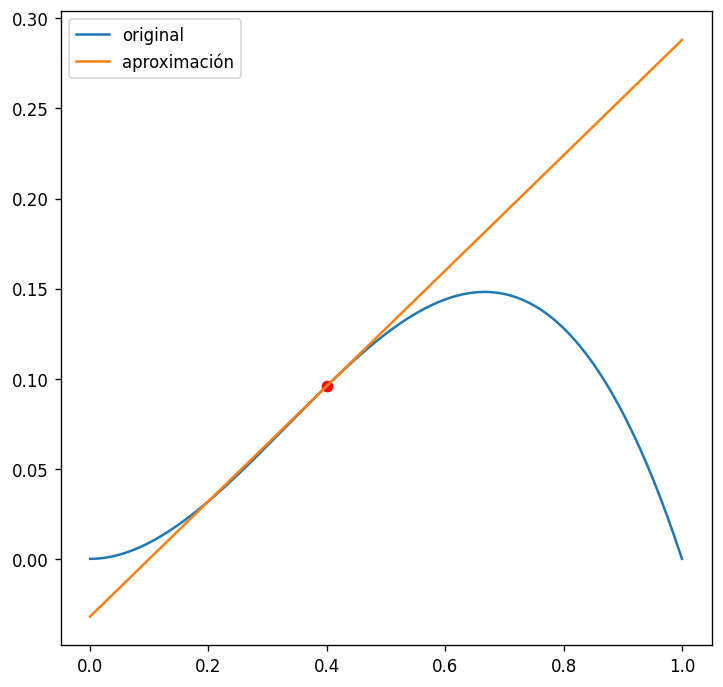

In [16]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)

x = np.linspace(0,1,1000)
taf = lambda x:tf(x,0.4)

ax.plot(x,f(x),label='original')
ax.plot(x,taf(x),label='aproximación')
ax.scatter(0.4,f(0.4),color='red')
ax.legend()
plt.show()

Ahora vamos a calcular algunas diferencias y errores de la aproximación

In [17]:
print('x = {}, f(x) = {}, Taylor f(x) = {}, |f(x) - Taylor f(x)| = {}'.format(0.3,f(0.3),taf(0.3),np.abs(f(0.3)-taf(0.3))))

x = 0.3, f(x) = 0.063, Taylor f(x) = 0.064, |f(x) - Taylor f(x)| = 0.0010000000000000009


In [18]:
print('x = {}, f(x) = {}, Taylor f(x) = {}, |f(x) - Taylor f(x)| = {}'.format(0.35,f(0.35),taf(0.35),np.abs(f(0.35)-taf(0.35))))

x = 0.35, f(x) = 0.079625, Taylor f(x) = 0.08, |f(x) - Taylor f(x)| = 0.00037500000000000033


In [19]:
print('x = {}, f(x) = {}, Taylor f(x) = {}, |f(x) - Taylor f(x)| = {}'.format(0.4,f(0.4),taf(0.4),np.abs(f(0.4)-taf(0.4))))

x = 0.4, f(x) = 0.09600000000000002, Taylor f(x) = 0.09600000000000002, |f(x) - Taylor f(x)| = 0.0


In [20]:
print('x = {}, f(x) = {}, Taylor f(x) = {}, |f(x) - Taylor f(x)| = {}'.format(0.45,f(0.45),taf(0.45),np.abs(f(0.45)-taf(0.45))))

x = 0.45, f(x) = 0.111375, Taylor f(x) = 0.11200000000000002, |f(x) - Taylor f(x)| = 0.0006250000000000144


In [21]:
print('x = {}, f(x) = {}, Taylor f(x) = {}, |f(x) - Taylor f(x)| = {}'.format(0.5,f(0.5),taf(0.5),np.abs(f(0.5)-taf(0.5))))

x = 0.5, f(x) = 0.125, Taylor f(x) = 0.128, |f(x) - Taylor f(x)| = 0.0030000000000000027


In [22]:
print('x = {}, f(x) = {}, Taylor f(x) = {}, |f(x) - Taylor f(x)| = {}'.format(0.8,f(0.8),taf(0.8),np.abs(f(0.8)-taf(0.8))))

x = 0.8, f(x) = 0.128, Taylor f(x) = 0.22399999999999998, |f(x) - Taylor f(x)| = 0.09599999999999997
